In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\Datasets\grocery.csv")
df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,CategoryName
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,44.2337,1,High,2018-01-06 22:26:53.580,Unknown,Unknown,41.0,Confections
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,Sardines,62.5460,8,Low,2017-12-03 21:41:12.420,Durable,False,90.0,Grain
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,79.0184,11,Medium,2017-08-19 07:18:29.890,Durable,True,0.0,Produce
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,Smirnoff Green Apple Twist,81.3167,6,High,2017-08-27 17:08:59.840,Durable,True,90.0,Seafood
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,Coffee - Dark Roast,79.9780,9,Low,2018-01-14 19:33:15.530,Weak,False,0.0,Poultry


Data Cleaning and EDA

In [3]:
df.shape

(200000, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SalesID            200000 non-null  int64  
 1   SalesPersonID      200000 non-null  int64  
 2   CustomerID         200000 non-null  int64  
 3   ProductID          200000 non-null  int64  
 4   Quantity           200000 non-null  int64  
 5   Discount           200000 non-null  float64
 6   TotalPrice         200000 non-null  float64
 7   SalesDate          197984 non-null  object 
 8   TransactionNumber  200000 non-null  object 
 9   ProductName        200000 non-null  object 
 10  Price              200000 non-null  float64
 11  CategoryID         200000 non-null  int64  
 12  Class              200000 non-null  object 
 13  ModifyDate         200000 non-null  object 
 14  Resistant          200000 non-null  object 
 15  IsAllergic         200000 non-null  object 
 16  Vi

In [5]:
df.isnull().sum()

SalesID                 0
SalesPersonID           0
CustomerID              0
ProductID               0
Quantity                0
Discount                0
TotalPrice              0
SalesDate            2016
TransactionNumber       0
ProductName             0
Price                   0
CategoryID              0
Class                   0
ModifyDate              0
Resistant               0
IsAllergic              0
VitalityDays            0
CategoryName            0
dtype: int64

In [6]:
df.describe()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,Price,CategoryID,VitalityDays
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,200000.000000,200000.000000,200000.000000
mean,100000.500000,12.011705,49259.156355,226.858575,12.969935,0.030043,0.0,50.860564,5.858235,26.063290
std,57735.171256,6.635250,28478.347579,130.163768,7.202895,0.063999,0.0,28.520211,3.264829,39.020064
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.044900,1.000000,0.000000
25%,50000.750000,6.000000,24567.750000,114.000000,7.000000,0.000000,0.0,26.577600,3.000000,0.000000
50%,100000.500000,12.000000,49211.000000,227.000000,13.000000,0.000000,0.0,52.636700,6.000000,0.000000
75%,150000.250000,18.000000,73843.250000,339.000000,19.000000,0.000000,0.0,75.248600,9.000000,54.000000
max,200000.000000,23.000000,98759.000000,452.000000,25.000000,0.200000,0.0,99.875500,11.000000,120.000000


In [7]:
# Corrected TotalPrice calculation
df['TotalPrice'] = df['Quantity'] * (df['Price'] * (1 - df['Discount']))

df.head()


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,CategoryName
0,1,6,27039,381,7,0.0,309.63590,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,44.2337,1,High,2018-01-06 22:26:53.580,Unknown,Unknown,41.0,Confections
1,2,16,25011,61,7,0.0,437.82200,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,Sardines,62.5460,8,Low,2017-12-03 21:41:12.420,Durable,False,90.0,Grain
2,3,13,94024,23,24,0.0,1896.44160,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,79.0184,11,Medium,2017-08-19 07:18:29.890,Durable,True,0.0,Produce
3,4,8,73966,176,19,0.2,1236.01384,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,Smirnoff Green Apple Twist,81.3167,6,High,2017-08-27 17:08:59.840,Durable,True,90.0,Seafood
4,5,10,32653,310,9,0.0,719.80200,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,Coffee - Dark Roast,79.9780,9,Low,2018-01-14 19:33:15.530,Weak,False,0.0,Poultry


In [8]:
# Convert SalesDate to datetime
df['SalesDate'] = pd.to_datetime(df['SalesDate'])

# Check for any remaining missing values after fixing
df.isnull().sum()

SalesID                 0
SalesPersonID           0
CustomerID              0
ProductID               0
Quantity                0
Discount                0
TotalPrice              0
SalesDate            2016
TransactionNumber       0
ProductName             0
Price                   0
CategoryID              0
Class                   0
ModifyDate              0
Resistant               0
IsAllergic              0
VitalityDays            0
CategoryName            0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

SalesID              0
SalesPersonID        0
CustomerID           0
ProductID            0
Quantity             0
Discount             0
TotalPrice           0
SalesDate            0
TransactionNumber    0
ProductName          0
Price                0
CategoryID           0
Class                0
ModifyDate           0
Resistant            0
IsAllergic           0
VitalityDays         0
CategoryName         0
dtype: int64

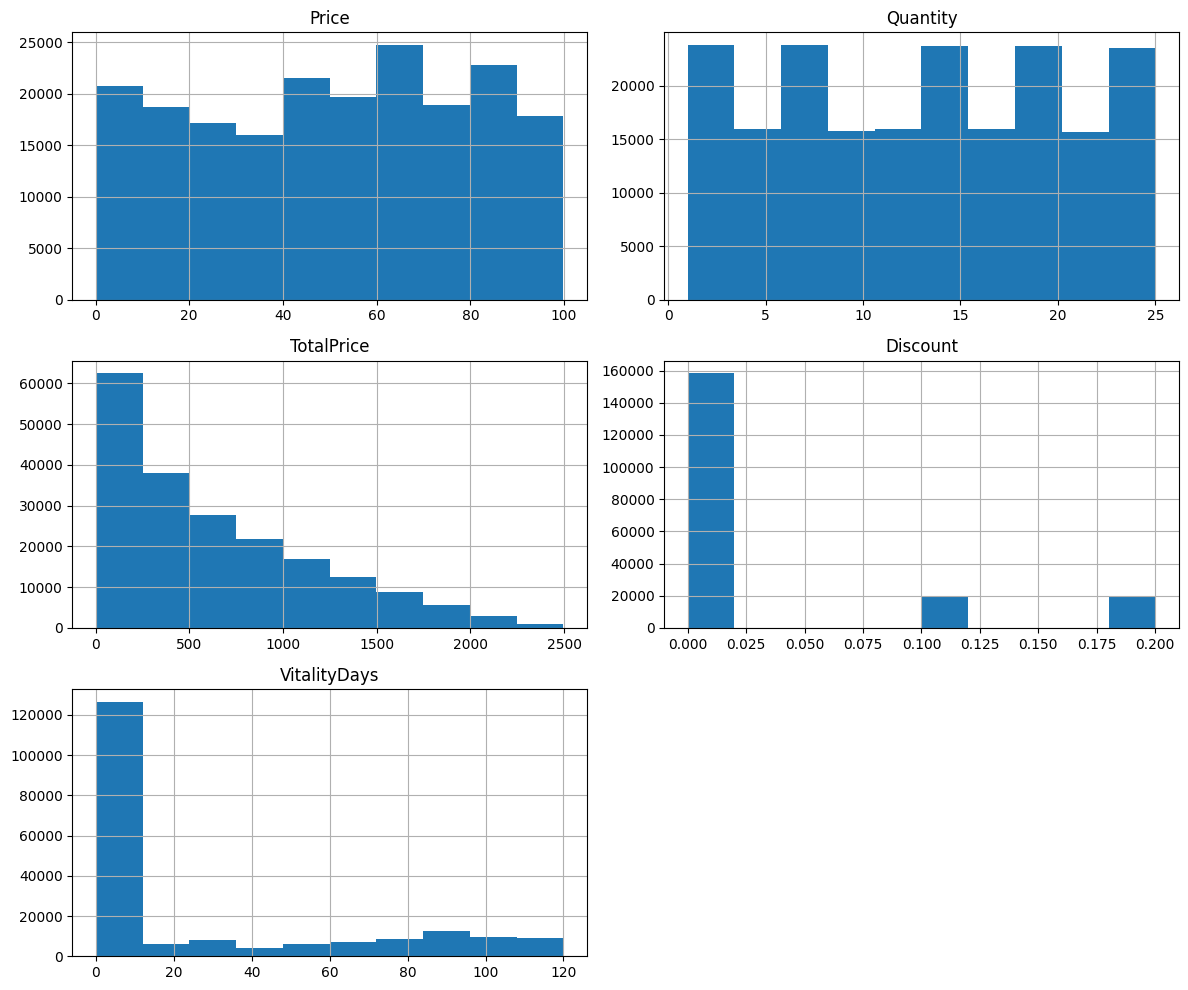

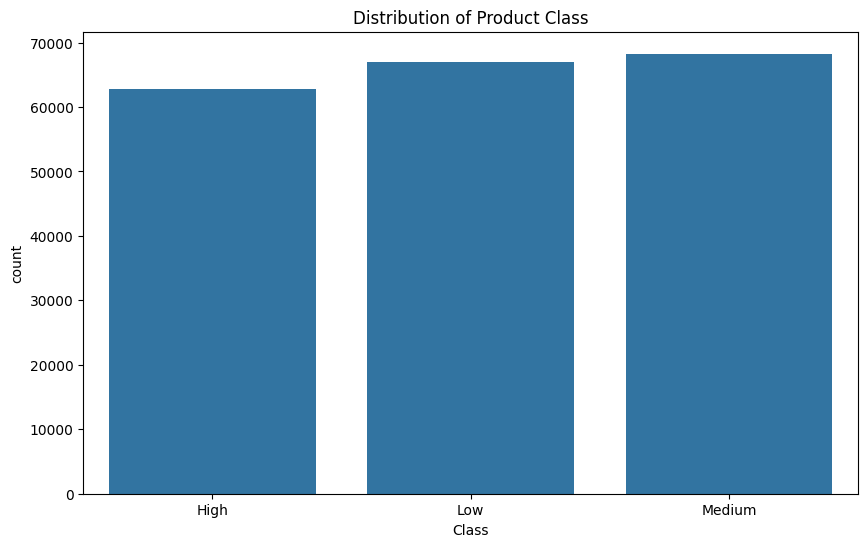

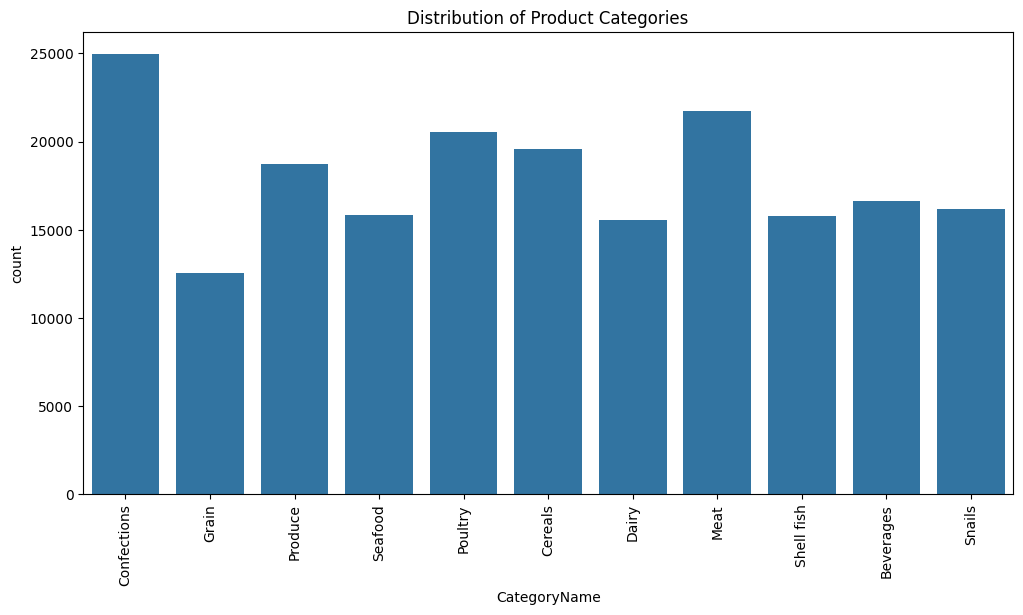

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
numerical_cols = ['Price', 'Quantity', 'TotalPrice', 'Discount', 'VitalityDays']
df[numerical_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Visualize categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Product Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='CategoryName', data=df)
plt.title('Distribution of Product Categories')
plt.xticks(rotation=90)
plt.show()


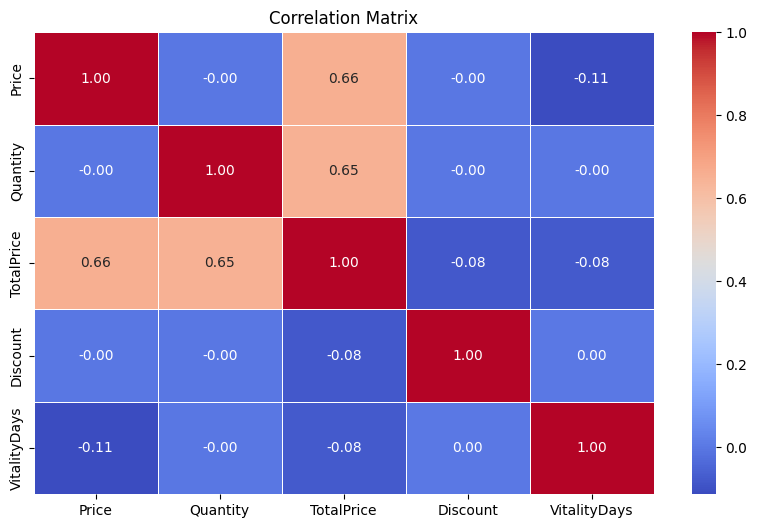

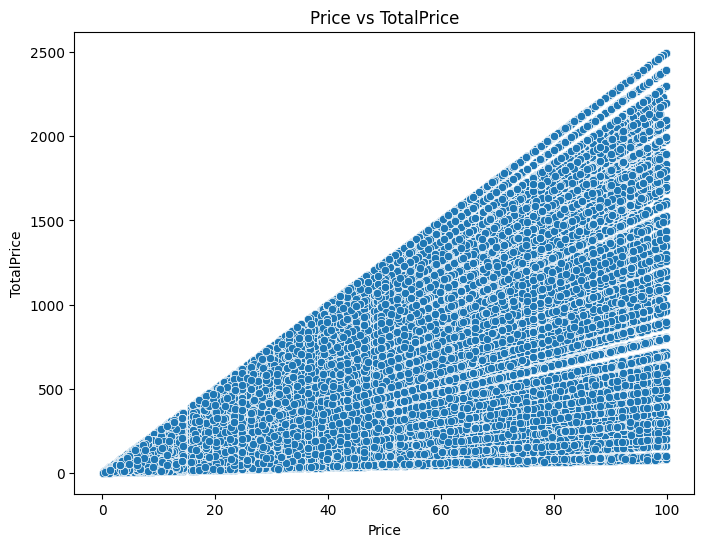

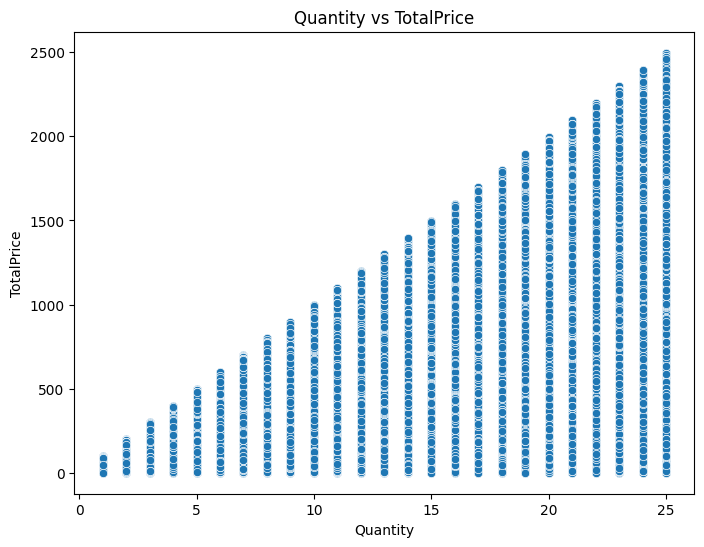

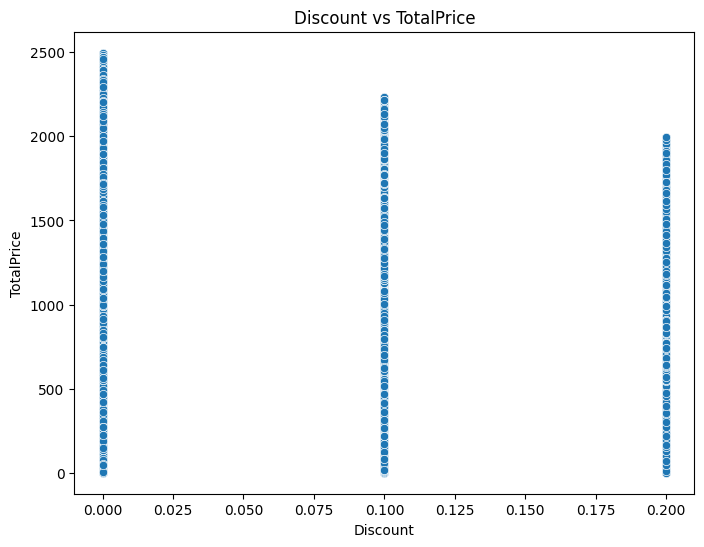

In [12]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plots to check relationships with TotalPrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='TotalPrice', data=df)
plt.title('Price vs TotalPrice')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='TotalPrice', data=df)
plt.title('Quantity vs TotalPrice')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='TotalPrice', data=df)
plt.title('Discount vs TotalPrice')
plt.show()


In [13]:
df.dtypes

SalesID                       int64
SalesPersonID                 int64
CustomerID                    int64
ProductID                     int64
Quantity                      int64
Discount                    float64
TotalPrice                  float64
SalesDate            datetime64[ns]
TransactionNumber            object
ProductName                  object
Price                       float64
CategoryID                    int64
Class                        object
ModifyDate                   object
Resistant                    object
IsAllergic                   object
VitalityDays                float64
CategoryName                 object
dtype: object

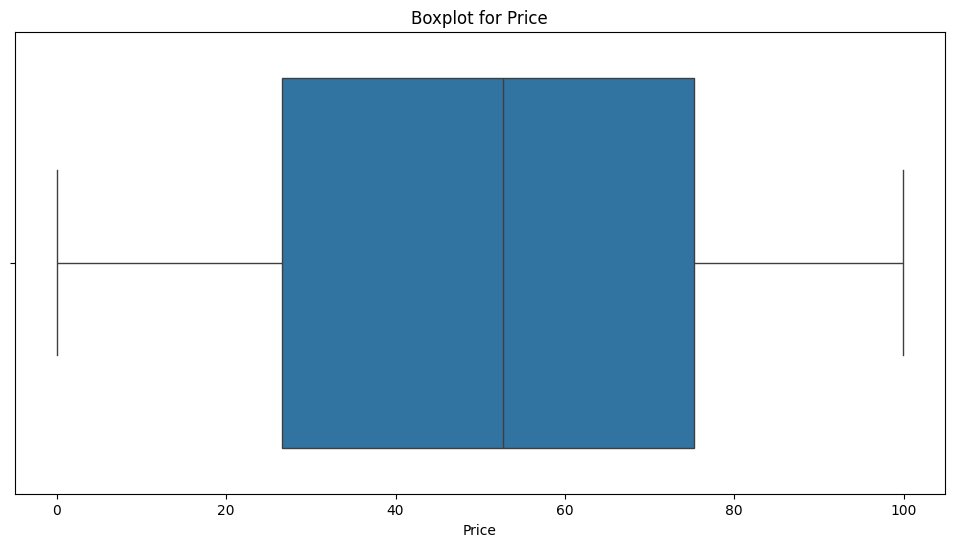

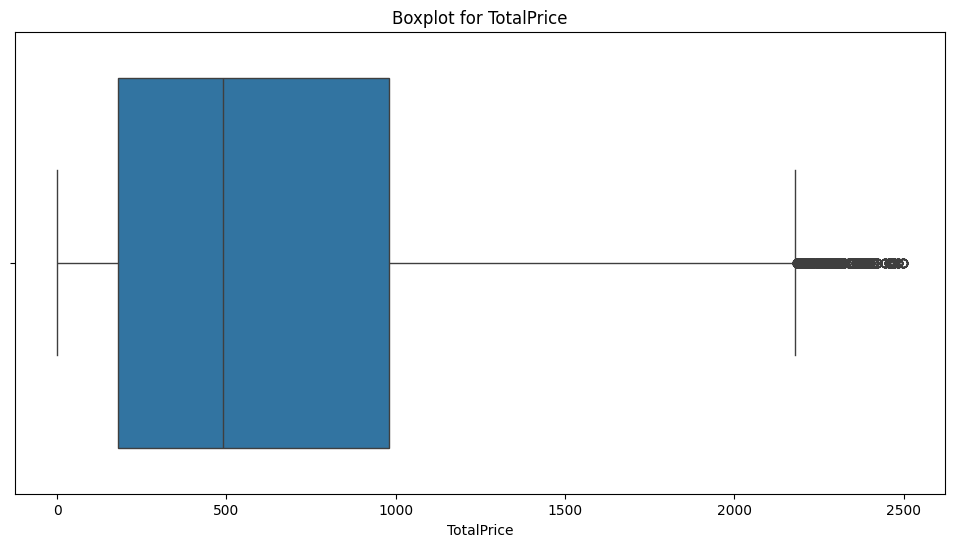

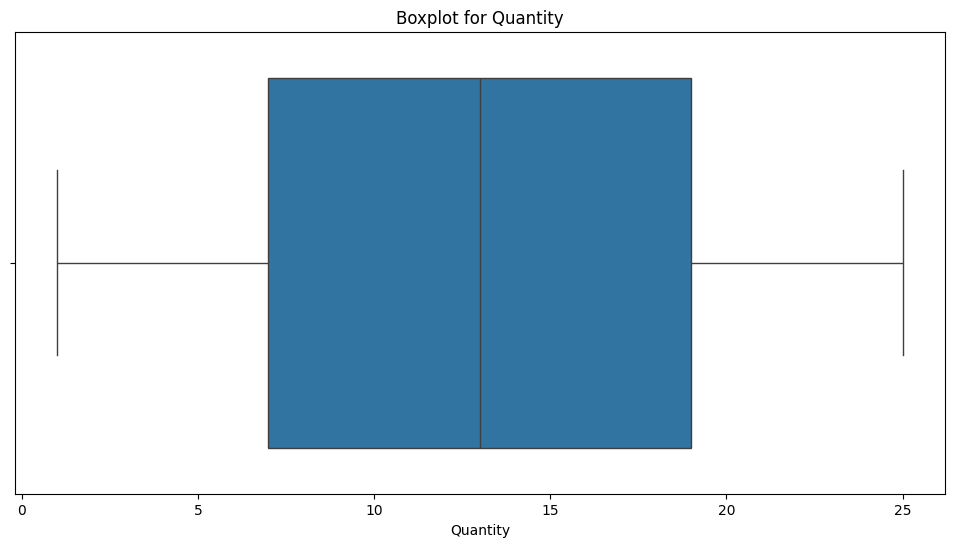

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price', data=df)
plt.title('Boxplot for Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='TotalPrice', data=df)
plt.title('Boxplot for TotalPrice')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Quantity', data=df)
plt.title('Boxplot for Quantity')
plt.show()


In [15]:
lst=['Discount','TotalPrice','Quantity','Price']
for i in lst:
    print(i,df[i].skew())

Discount 1.9166878027113823
TotalPrice 0.9168480659953789
Quantity 0.004406026943016473
Price -0.11727184402959802


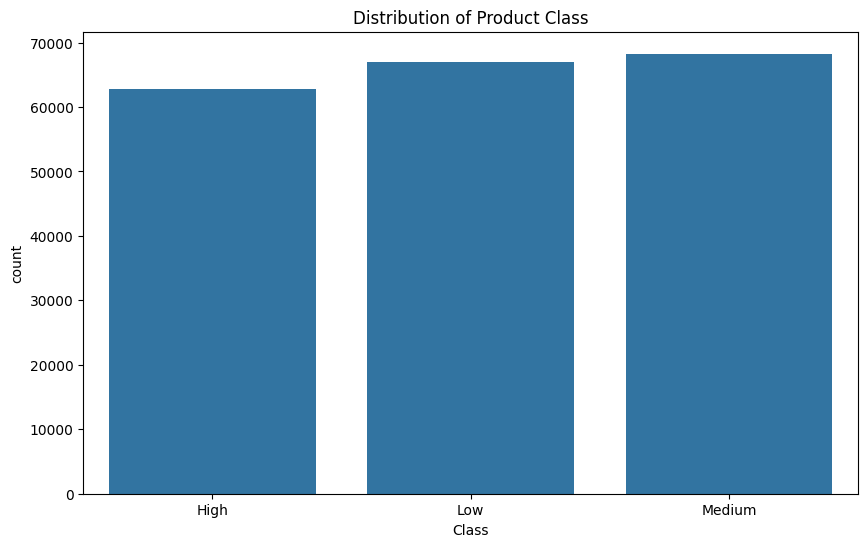

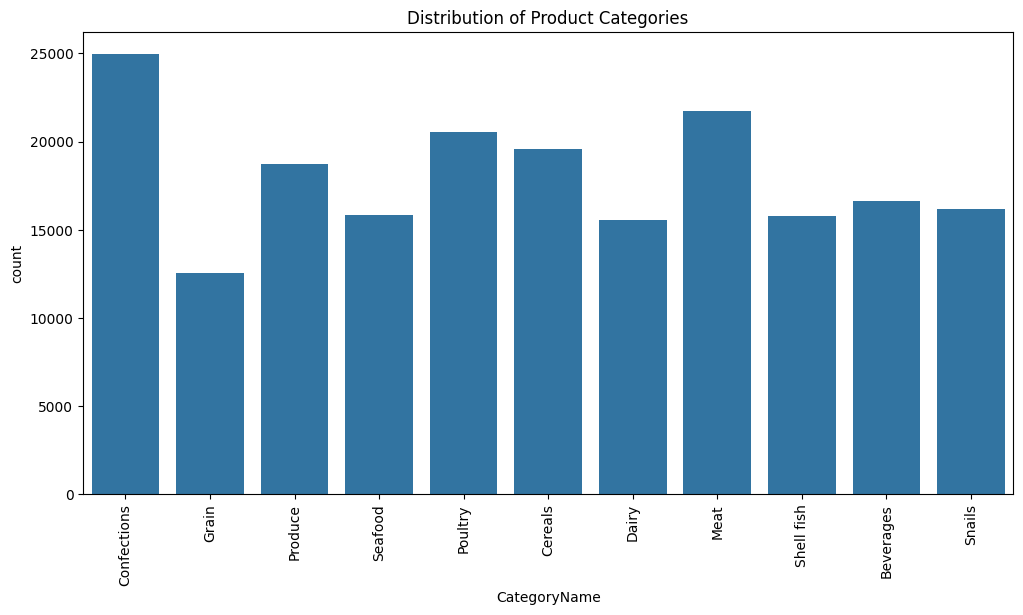

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Product Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='CategoryName', data=df)
plt.title('Distribution of Product Categories')
plt.xticks(rotation=90)
plt.show()


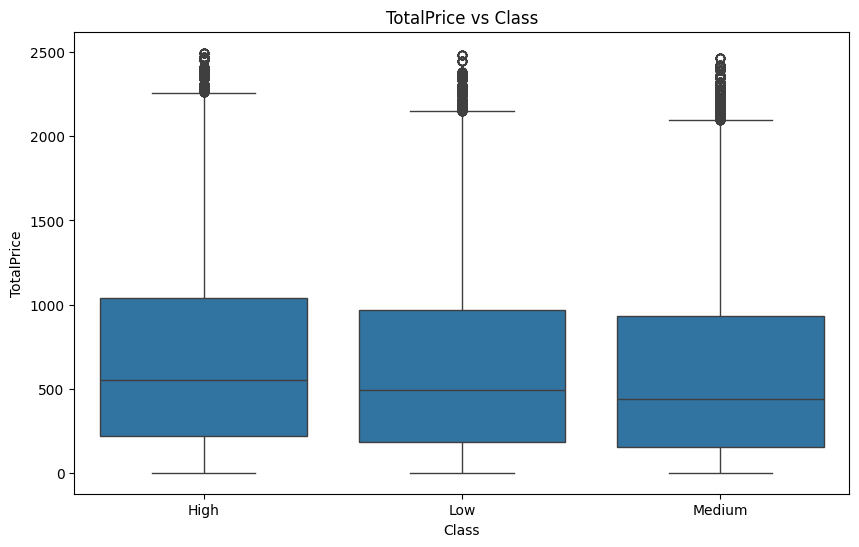

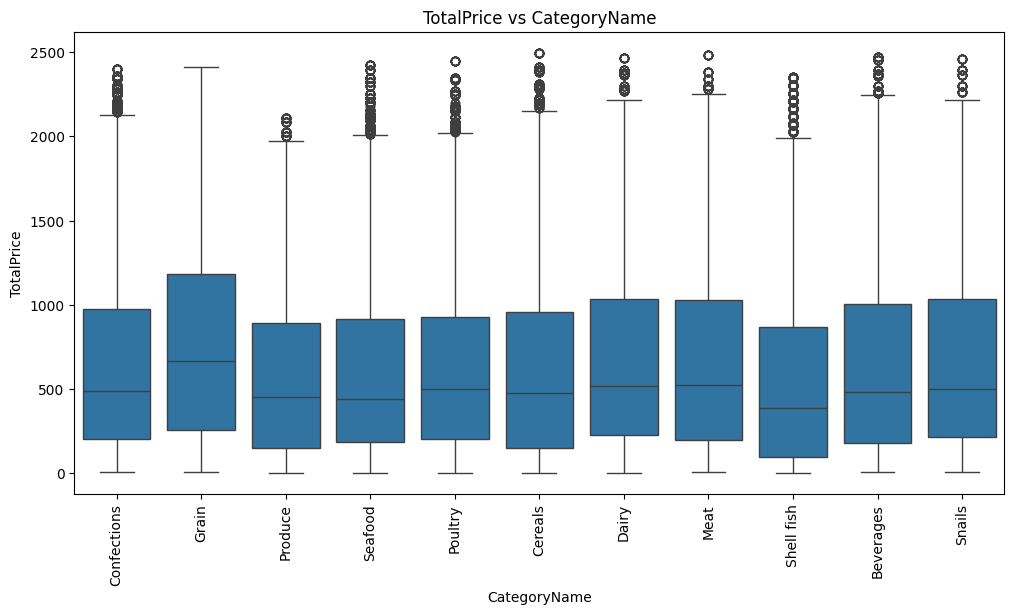

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='TotalPrice', data=df)
plt.title('TotalPrice vs Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='CategoryName', y='TotalPrice', data=df)
plt.title('TotalPrice vs CategoryName')
plt.xticks(rotation=90)
plt.show()


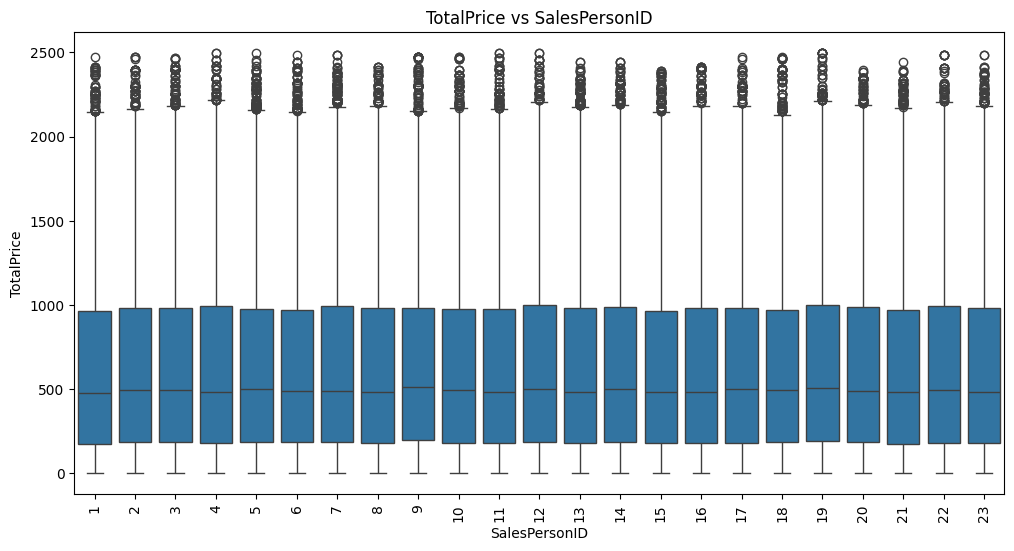

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='SalesPersonID', y='TotalPrice', data=df)
plt.title('TotalPrice vs SalesPersonID')
plt.xticks(rotation=90)
plt.show(


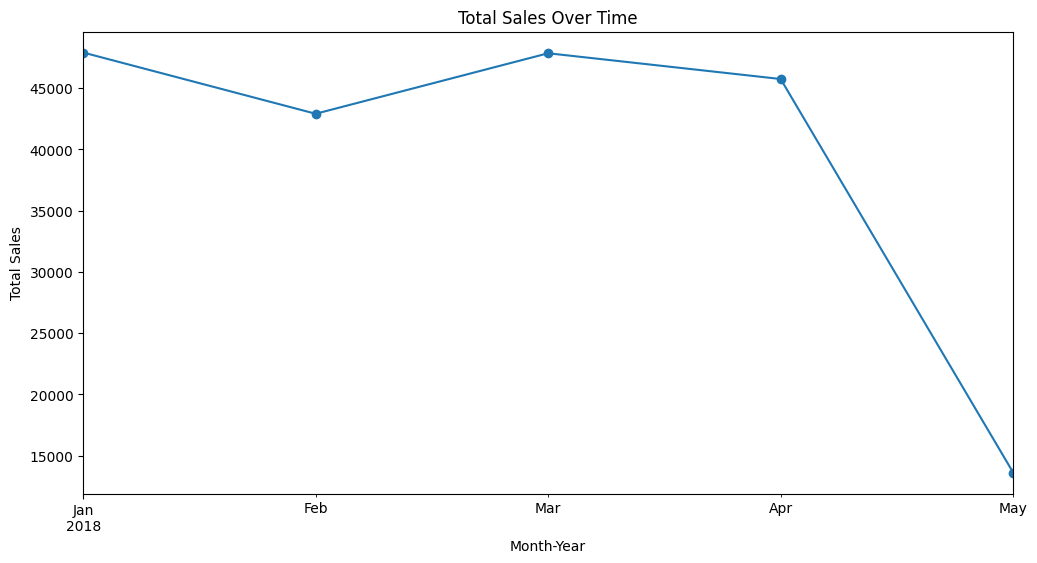

In [19]:
# Resampling by month to aggregate sales by month
df['MonthYear'] = df['SalesDate'].dt.to_period('M')
sales_per_month = df.groupby('MonthYear')['TotalPrice'].count()

plt.figure(figsize=(12, 6))
sales_per_month.plot(kind='line', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.show()


In [20]:
df=df.drop('MonthYear',axis=1)

Feature Engineering

In [21]:
# 1. TotalRevenue: Already created as (Quantity * Price after Discount)
df['TotalRevenue'] = df['Quantity'] * (df['Price'] * (1 - df['Discount']))

# 2. DiscountedPrice: Price after discount
df['DiscountedPrice'] = df['Price'] * (1 - df['Discount'])

# 3. PricePerUnit: Price divided by quantity
df['PricePerUnit'] = df['Price'] / df['Quantity']

# 4. Temporal Features:
df['Month'] = df['SalesDate'].dt.month
df['DayOfWeek'] = df['SalesDate'].dt.dayofweek
df['Year'] = df['SalesDate'].dt.year
df['DayOfYear'] = df['SalesDate'].dt.dayofyear
df['IsWeekend'] = df['SalesDate'].dt.weekday >= 5  # Saturday=5, Sunday=6


# 6. Interaction Features:
df['Price_X_Quantity'] = df['Price'] * df['Quantity']
df['Discount_X_Price'] = df['Discount'] * df['Price']

# 7. Discount Impact:
df['DiscountAmount'] = df['Price'] * df['Discount']
df['DiscountPercentage'] = df['DiscountAmount'] / df['Price']

# 8. Customer-Centric Features:
df['SalesCountPerCustomer'] = df.groupby('CustomerID')['SalesID'].transform('count')
df['AvgSpendPerCustomer'] = df.groupby('CustomerID')['TotalRevenue'].transform('mean')

# 9. Salesperson Performance:
df['SalesCountPerSalesperson'] = df.groupby('SalesPersonID')['SalesID'].transform('count')
df['AvgRevenuePerSalesperson'] = df.groupby('SalesPersonID')['TotalRevenue'].transform('mean')

# 10. Product Performance:
df['SalesCountPerProduct'] = df.groupby('ProductID')['SalesID'].transform('count')
df['AvgRevenuePerProduct'] = df.groupby('ProductID')['TotalRevenue'].transform('mean')

# Check the updated dataframe with new features
df.head()


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,...,Price_X_Quantity,Discount_X_Price,DiscountAmount,DiscountPercentage,SalesCountPerCustomer,AvgSpendPerCustomer,SalesCountPerSalesperson,AvgRevenuePerSalesperson,SalesCountPerProduct,AvgRevenuePerProduct
0,1,6,27039,381,7,0.0,309.63590,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,...,309.6359,0.00000,0.00000,0.0,2,413.765800,8565,635.810134,456,554.919527
1,2,16,25011,61,7,0.0,437.82200,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,Sardines,...,437.8220,0.00000,0.00000,0.0,1,437.822000,8590,639.544982,465,773.862154
2,3,13,94024,23,24,0.0,1896.44160,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,...,1896.4416,0.00000,0.00000,0.0,2,1692.796800,8619,639.521724,415,1022.631380
3,4,8,73966,176,19,0.2,1236.01384,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,Smirnoff Green Apple Twist,...,1545.0173,16.26334,16.26334,0.2,3,900.639013,8680,637.474584,447,1012.656694
4,5,10,32653,310,9,0.0,719.80200,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,Coffee - Dark Roast,...,719.8020,0.00000,0.00000,0.0,1,719.802000,8727,632.102598,432,992.245576


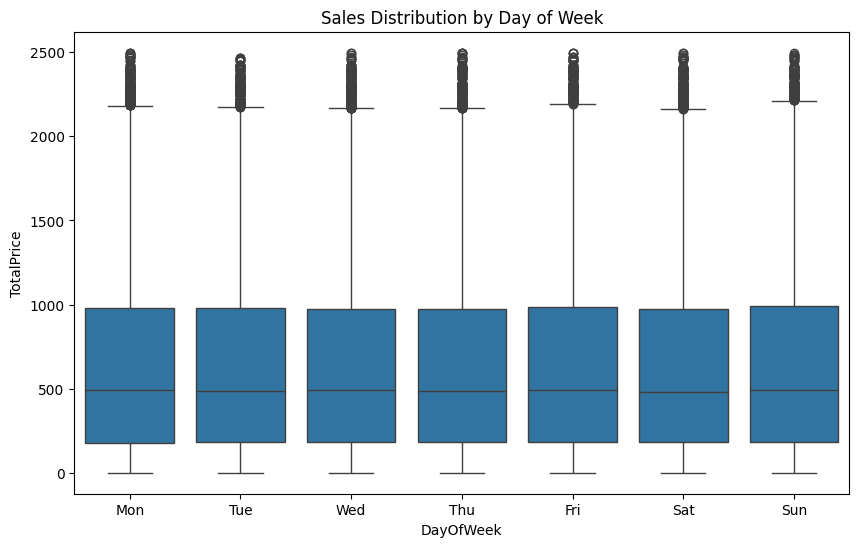

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='TotalPrice', data=df)
plt.title('Sales Distribution by Day of Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


In [23]:
# One-hot Encoding for Product Category (CategoryName)
df = pd.get_dummies(df, columns=['CategoryName'], drop_first=True)

In [24]:
pd.set_option('Display.max_columns',None)

In [25]:
df.isnull().sum()

SalesID                     0
SalesPersonID               0
CustomerID                  0
ProductID                   0
Quantity                    0
Discount                    0
TotalPrice                  0
SalesDate                   0
TransactionNumber           0
ProductName                 0
Price                       0
CategoryID                  0
Class                       0
ModifyDate                  0
Resistant                   0
IsAllergic                  0
VitalityDays                0
TotalRevenue                0
DiscountedPrice             0
PricePerUnit                0
Month                       0
DayOfWeek                   0
Year                        0
DayOfYear                   0
IsWeekend                   0
Price_X_Quantity            0
Discount_X_Price            0
DiscountAmount              0
DiscountPercentage          0
SalesCountPerCustomer       0
AvgSpendPerCustomer         0
SalesCountPerSalesperson    0
AvgRevenuePerSalesperson    0
SalesCount

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197984 entries, 0 to 199999
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   197984 non-null  int64         
 1   SalesPersonID             197984 non-null  int64         
 2   CustomerID                197984 non-null  int64         
 3   ProductID                 197984 non-null  int64         
 4   Quantity                  197984 non-null  int64         
 5   Discount                  197984 non-null  float64       
 6   TotalPrice                197984 non-null  float64       
 7   SalesDate                 197984 non-null  datetime64[ns]
 8   TransactionNumber         197984 non-null  object        
 9   ProductName               197984 non-null  object        
 10  Price                     197984 non-null  float64       
 11  CategoryID                197984 non-null  int64         
 12  Class  

In [27]:
df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,TotalRevenue,DiscountedPrice,PricePerUnit,Month,DayOfWeek,Year,DayOfYear,IsWeekend,Price_X_Quantity,Discount_X_Price,DiscountAmount,DiscountPercentage,SalesCountPerCustomer,AvgSpendPerCustomer,SalesCountPerSalesperson,AvgRevenuePerSalesperson,SalesCountPerProduct,AvgRevenuePerProduct,CategoryName_Cereals,CategoryName_Confections,CategoryName_Dairy,CategoryName_Grain,CategoryName_Meat,CategoryName_Poultry,CategoryName_Produce,CategoryName_Seafood,CategoryName_Shell fish,CategoryName_Snails
0,1,6,27039,381,7,0.0,309.63590,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,44.2337,1,High,2018-01-06 22:26:53.580,Unknown,Unknown,41.0,309.63590,44.23370,6.319100,2,0,2018,36,False,309.6359,0.00000,0.00000,0.0,2,413.765800,8565,635.810134,456,554.919527,False,True,False,False,False,False,False,False,False,False
1,2,16,25011,61,7,0.0,437.82200,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,Sardines,62.5460,8,Low,2017-12-03 21:41:12.420,Durable,False,90.0,437.82200,62.54600,8.935143,2,4,2018,33,False,437.8220,0.00000,0.00000,0.0,1,437.822000,8590,639.544982,465,773.862154,False,False,False,True,False,False,False,False,False,False
2,3,13,94024,23,24,0.0,1896.44160,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,79.0184,11,Medium,2017-08-19 07:18:29.890,Durable,True,0.0,1896.44160,79.01840,3.292433,5,3,2018,123,False,1896.4416,0.00000,0.00000,0.0,2,1692.796800,8619,639.521724,415,1022.631380,False,False,False,False,False,False,True,False,False,False
3,4,8,73966,176,19,0.2,1236.01384,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,Smirnoff Green Apple Twist,81.3167,6,High,2017-08-27 17:08:59.840,Durable,True,90.0,1236.01384,65.05336,4.279826,4,5,2018,97,True,1545.0173,16.26334,16.26334,0.2,3,900.639013,8680,637.474584,447,1012.656694,False,False,False,False,False,False,False,True,False,False
4,5,10,32653,310,9,0.0,719.80200,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,Coffee - Dark Roast,79.9780,9,Low,2018-01-14 19:33:15.530,Weak,False,0.0,719.80200,79.97800,8.886444,2,0,2018,43,False,719.8020,0.00000,0.00000,0.0,1,719.802000,8727,632.102598,432,992.245576,False,False,False,False,False,True,False,False,False,False


Statistical Testing

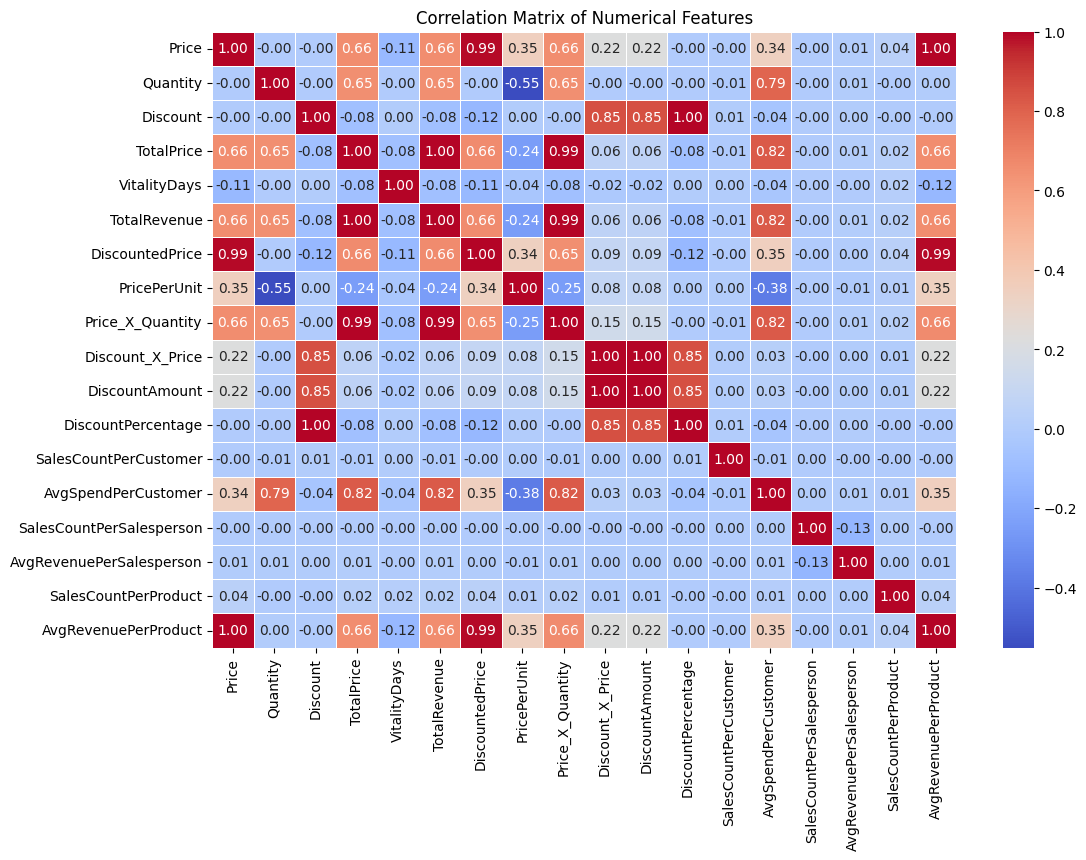

In [28]:
# Select numerical columns for correlation analysis
numerical_cols = ['Price', 'Quantity', 'Discount', 'TotalPrice', 'VitalityDays', 'TotalRevenue', 
                  'DiscountedPrice', 'PricePerUnit', 'Price_X_Quantity', 'Discount_X_Price', 
                  'DiscountAmount', 'DiscountPercentage', 'SalesCountPerCustomer', 'AvgSpendPerCustomer', 
                  'SalesCountPerSalesperson', 'AvgRevenuePerSalesperson', 'SalesCountPerProduct', 'AvgRevenuePerProduct']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [29]:
# ANOVA for 'Class' vs 'TotalPrice'
from scipy.stats import f_oneway

# Group by 'Class' and calculate the TotalPrice for each group
class_groups = [df['TotalPrice'][df['Class'] == class_name] for class_name in df['Class'].unique()]
f_stat, p_val = f_oneway(*class_groups)

print("ANOVA for Class vs TotalPrice")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")


ANOVA for Class vs TotalPrice
F-statistic: 355.32348816821934
P-value: 9.146679486210832e-155


In [30]:
from scipy.stats import f_oneway

# List of CategoryName one-hot encoded columns
category_columns = ['CategoryName_Cereals', 'CategoryName_Confections', 'CategoryName_Dairy',
                    'CategoryName_Grain', 'CategoryName_Meat', 'CategoryName_Poultry', 
                    'CategoryName_Produce', 'CategoryName_Seafood', 'CategoryName_Shell fish',
                    'CategoryName_Snails']

# Perform ANOVA for each category feature
for category in category_columns:
    # Group TotalPrice by Category
    category_group = [df['TotalPrice'][df[category] == 1], df['TotalPrice'][df[category] == 0]]
    
    # Perform ANOVA
    f_stat, p_val = f_oneway(*category_group)
    
    # Print the result
    print(f"ANOVA for {category} vs TotalPrice")
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_val}")
    print("-" * 50)



ANOVA for CategoryName_Cereals vs TotalPrice
F-statistic: 3.645766595649435
P-value: 0.056213364473813976
--------------------------------------------------
ANOVA for CategoryName_Confections vs TotalPrice
F-statistic: 9.559338804105645
P-value: 0.001989623768770325
--------------------------------------------------
ANOVA for CategoryName_Dairy vs TotalPrice
F-statistic: 66.27547582399065
P-value: 3.9435291212968326e-16
--------------------------------------------------
ANOVA for CategoryName_Grain vs TotalPrice
F-statistic: 860.3259287490456
P-value: 1.0528769640823471e-188
--------------------------------------------------
ANOVA for CategoryName_Meat vs TotalPrice
F-statistic: 42.991530695473436
P-value: 5.511171469097499e-11
--------------------------------------------------
ANOVA for CategoryName_Poultry vs TotalPrice
F-statistic: 20.483372387246508
P-value: 6.018646793203016e-06
--------------------------------------------------
ANOVA for CategoryName_Produce vs TotalPrice
F-stati

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197984 entries, 0 to 199999
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   197984 non-null  int64         
 1   SalesPersonID             197984 non-null  int64         
 2   CustomerID                197984 non-null  int64         
 3   ProductID                 197984 non-null  int64         
 4   Quantity                  197984 non-null  int64         
 5   Discount                  197984 non-null  float64       
 6   TotalPrice                197984 non-null  float64       
 7   SalesDate                 197984 non-null  datetime64[ns]
 8   TransactionNumber         197984 non-null  object        
 9   ProductName               197984 non-null  object        
 10  Price                     197984 non-null  float64       
 11  CategoryID                197984 non-null  int64         
 12  Class  

Final Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

df['Resistant'] = label_encoder.fit_transform(df['Resistant'])

df['IsAllergic'] = label_encoder.fit_transform(df['IsAllergic'])


In [33]:
df = df.drop(columns=['SalesDate'])#No longer needed

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197984 entries, 0 to 199999
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   197984 non-null  int64  
 1   SalesPersonID             197984 non-null  int64  
 2   CustomerID                197984 non-null  int64  
 3   ProductID                 197984 non-null  int64  
 4   Quantity                  197984 non-null  int64  
 5   Discount                  197984 non-null  float64
 6   TotalPrice                197984 non-null  float64
 7   TransactionNumber         197984 non-null  object 
 8   ProductName               197984 non-null  object 
 9   Price                     197984 non-null  float64
 10  CategoryID                197984 non-null  int64  
 11  Class                     197984 non-null  int64  
 12  ModifyDate                197984 non-null  object 
 13  Resistant                 197984 non-null  int64 

In [35]:
df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,TransactionNumber,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,TotalRevenue,DiscountedPrice,PricePerUnit,Month,DayOfWeek,Year,DayOfYear,IsWeekend,Price_X_Quantity,Discount_X_Price,DiscountAmount,DiscountPercentage,SalesCountPerCustomer,AvgSpendPerCustomer,SalesCountPerSalesperson,AvgRevenuePerSalesperson,SalesCountPerProduct,AvgRevenuePerProduct,CategoryName_Cereals,CategoryName_Confections,CategoryName_Dairy,CategoryName_Grain,CategoryName_Meat,CategoryName_Poultry,CategoryName_Produce,CategoryName_Seafood,CategoryName_Shell fish,CategoryName_Snails
0,1,6,27039,381,7,0.0,309.63590,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,44.2337,1,0,2018-01-06 22:26:53.580,1,2,41.0,309.63590,44.23370,6.319100,2,0,2018,36,False,309.6359,0.00000,0.00000,0.0,2,413.765800,8565,635.810134,456,554.919527,False,True,False,False,False,False,False,False,False,False
1,2,16,25011,61,7,0.0,437.82200,12UGLX40DJ1A5DTFBHB8,Sardines,62.5460,8,1,2017-12-03 21:41:12.420,0,0,90.0,437.82200,62.54600,8.935143,2,4,2018,33,False,437.8220,0.00000,0.00000,0.0,1,437.822000,8590,639.544982,465,773.862154,False,False,False,True,False,False,False,False,False,False
2,3,13,94024,23,24,0.0,1896.44160,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,79.0184,11,2,2017-08-19 07:18:29.890,0,1,0.0,1896.44160,79.01840,3.292433,5,3,2018,123,False,1896.4416,0.00000,0.00000,0.0,2,1692.796800,8619,639.521724,415,1022.631380,False,False,False,False,False,False,True,False,False,False
3,4,8,73966,176,19,0.2,1236.01384,R3DR9MLD5NR76VO17ULE,Smirnoff Green Apple Twist,81.3167,6,0,2017-08-27 17:08:59.840,0,1,90.0,1236.01384,65.05336,4.279826,4,5,2018,97,True,1545.0173,16.26334,16.26334,0.2,3,900.639013,8680,637.474584,447,1012.656694,False,False,False,False,False,False,False,True,False,False
4,5,10,32653,310,9,0.0,719.80200,4BGS0Z5OMAZ8NDAFHHP3,Coffee - Dark Roast,79.9780,9,1,2018-01-14 19:33:15.530,2,0,0.0,719.80200,79.97800,8.886444,2,0,2018,43,False,719.8020,0.00000,0.00000,0.0,1,719.802000,8727,632.102598,432,992.245576,False,False,False,False,False,True,False,False,False,False


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Select significant features from the list
selected_features = [
    'Class', 'CategoryName_Confections', 'CategoryName_Dairy', 'CategoryName_Grain', 
    'CategoryName_Meat', 'CategoryName_Poultry', 'CategoryName_Snails',
    'Price', 'DiscountedPrice', 'Quantity', 'Discount',
    'SalesCountPerCustomer', 'AvgSpendPerCustomer', 'SalesCountPerSalesperson',
    'AvgRevenuePerSalesperson', 'SalesCountPerProduct', 'AvgRevenuePerProduct',
    'Year', 'Month', 'DayOfWeek', 'DayOfYear', 'IsWeekend'
]

# Prepare the features (X) and target (y)
X = df[selected_features]
y = df['TotalPrice']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Predict on test set
y_pred = linear_reg_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display results
print("Linear Regression Model Metrics:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Linear Regression Model Metrics:
MAE: 139.6192053860236
RMSE: 185.52831530533774
R²: 0.8855883836318237


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The Final Model with the best results

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display results
print("Random Forest Regressor Model Metrics:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Random Forest Regressor Model Metrics:
MAE: 0.42438358381463653
RMSE: 2.435750319076532
R²: 0.9999802796210803


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred = gb_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display results
print("Gradient Boosting Regressor Model Metrics:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Gradient Boosting Regressor Model Metrics:
MAE: 22.908456710021962
RMSE: 32.078760320982866
R²: 0.9965795371911514


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
from xgboost import XGBRegressor

# Initialize XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display results
print("XGBoost Regressor Model Metrics:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


XGBoost Regressor Model Metrics:
MAE: 8.344433305154736
RMSE: 11.88729081157033
R²: 0.9995303054789921


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Feature Importance Plot for Random Forest Regressor

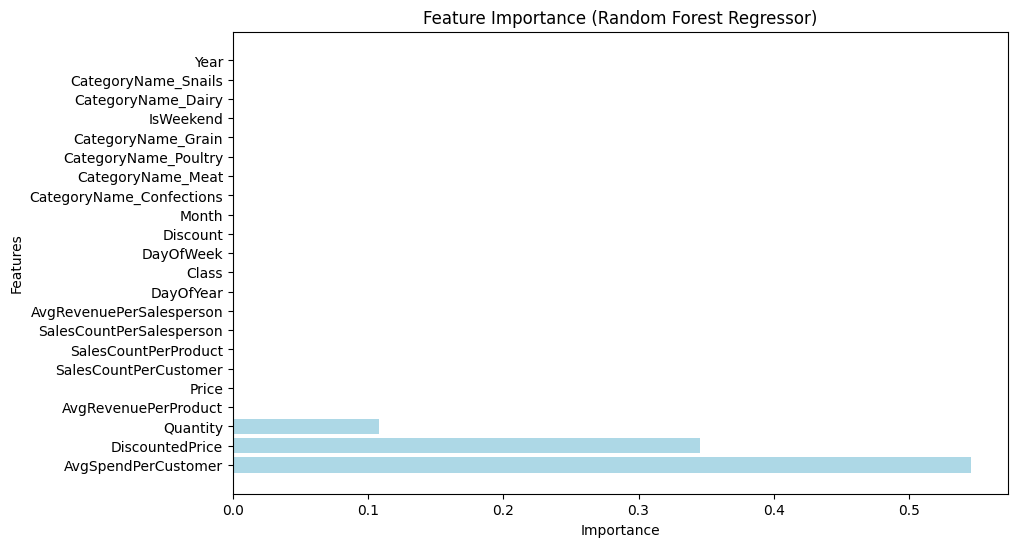

                     Feature    Importance
12       AvgSpendPerCustomer  5.458552e-01
8            DiscountedPrice  3.451783e-01
9                   Quantity  1.084074e-01
16      AvgRevenuePerProduct  3.634119e-04
7                      Price  1.650220e-04
11     SalesCountPerCustomer  1.145328e-05
15      SalesCountPerProduct  3.650294e-06
13  SalesCountPerSalesperson  2.825595e-06
14  AvgRevenuePerSalesperson  2.499891e-06
20                 DayOfYear  2.480902e-06
0                      Class  1.701241e-06
19                 DayOfWeek  1.416623e-06
10                  Discount  9.661967e-07
18                     Month  8.328015e-07
1   CategoryName_Confections  6.165810e-07
4          CategoryName_Meat  4.379515e-07
5       CategoryName_Poultry  4.377632e-07
3         CategoryName_Grain  4.361319e-07
21                 IsWeekend  2.925914e-07
2         CategoryName_Dairy  2.915752e-07
6        CategoryName_Snails  2.802947e-07
17                      Year  0.000000e+00


In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to view feature importances
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightblue')
plt.title('Feature Importance (Random Forest Regressor)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Display the sorted feature importance
print(feature_importance_df)


Hyperparameter Tuning on Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]         # Whether bootstrap samples are used when building trees
}

# Initialize the GridSearchCV with RandomForest model and parameter grid
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           verbose=2,  # Display progress
                           n_jobs=-1)  # Use all available CPUs

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)
print("Best Cross-validation Score: ", grid_search.best_score_)

# Evaluate the model with the best parameters on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate performance with MAE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Checks For Overfitting of the model

In [43]:
# Predict on training data
y_train_pred = rf_model.predict(X_train)

# Calculate training set performance
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = rf_model.predict(X_test)

# Calculate test set performance
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Training Set Metrics:")
print(f"MAE: {train_mae}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")

print("\nTest Set Metrics:")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training Set Metrics:
MAE: 0.16513512485342122
RMSE: 0.9630099007535835
R²: 0.999996876975505

Test Set Metrics:
MAE: 0.42438358381463653
RMSE: 2.435750319076532
R²: 0.9999802796210803


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the model
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert to positive values since scoring is negative
cv_scores = -cv_scores

# Calculate average and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Cross-validation Mean RMSE: {cv_mean}")
print(f"Cross-validation Std Dev RMSE: {cv_std}")


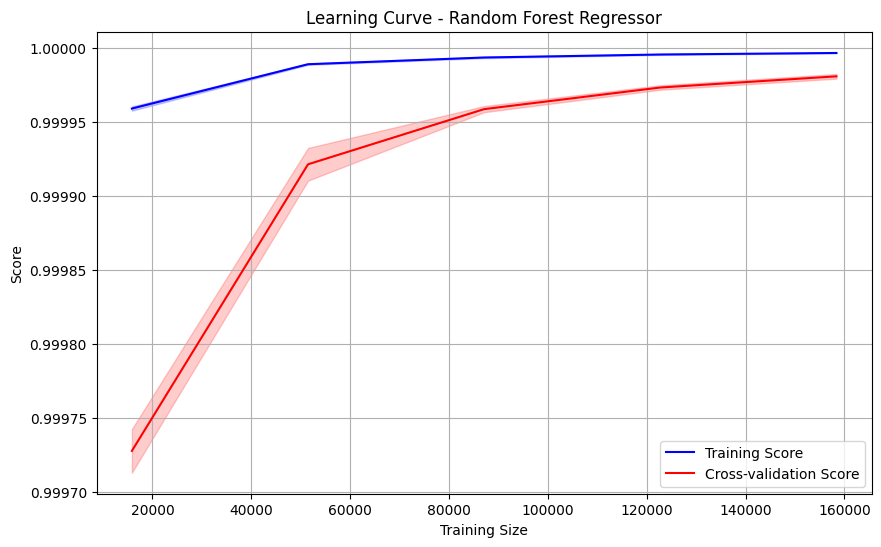

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Generate learning curves with n_jobs=1 to avoid multiprocessing issues
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

plt.title("Learning Curve - Random Forest Regressor")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


Very high accuracy: Model performs extremely well on both training and validation data.
Training score is slightly higher than validation, but the gap is small.
No need for more data: Increasing training size doesn’t lead to significant improvement.
The cross validation score is high as well that states it generalizes well.
No data leakage as the target variable or any variable redundant to it is also not in the features list.
Also there is very less difference in training and test set RMSE and R2 that tells it is not perfectly fitted or overfitted.